In [55]:
from Bio import SeqIO
import re
from collections import Counter

In [5]:
def stats(file):
    num_contig = 0 
    contig_li = []
    pattern = 'len[0-9]+'
    pattern_2 = '[0-9]+'
    with open(file) as file:
        for record in SeqIO.parse(file, "fasta"):
            num_contig += 1 # the number of contigs
            contig_li.append(record.id)
    contig_li2 = []
    for con in contig_li:
        result = re.findall(pattern, con)
        if result:
            contig_li2.append(result)
    li_3 = []
    for i in contig_li2:
        for x in i:
            result = re.findall(pattern_2, x)
        if result:
            li_3.append(result)
    sum1 = []
    for i in li_3:
        for x in i:
            sum1.append(x)
    sum2 = [int(i) for i in sum1]
    all_sum = sum(sum2) # the sum of all contigs
    max_sum = max(sum2) # the longest contig
    tmp = [] # N50
    for tmp_number in set(sum2):
            tmp += [tmp_number] * sum2.count(tmp_number) * tmp_number
    tmp.sort()
    if (len(tmp) % 2) == 0:
        median = (tmp[int(len(tmp) / 2) - 1] + tmp[int(len(tmp) / 2)]) / 2
    else:
        median = tmp[int(len(tmp) / 2)]
    print('The number of contigs: {}\nThe sum of all contigs: {}\nThe longest contig: {}\nN50: {}'.format(num_contig, all_sum, max_sum, median))

In [6]:
stats('data/Poil_contig.fa')

The number of contigs: 613
The sum of all contigs: 3925691
The longest contig: 179307
N50: 52799


In [10]:
def stats_scaff(file):
    num_scaff = 0 
    scaff_li = []
    pattern = 'len[0-9]+'
    pattern_2 = '[0-9]+'
    with open(file) as file:
        for record in SeqIO.parse(file, "fasta"):
            num_scaff += 1 # the number of scaffolds
            scaff_li.append(record.id)
    scaff_li2 = []
    for scaff in scaff_li:
        result = re.findall(pattern, scaff)
        if result:
            scaff_li2.append(result)
    li_3 = []
    for i in scaff_li2:
        for x in i:
            result = re.findall(pattern_2, x)
        if result:
            li_3.append(result)
    sum1 = []
    for i in li_3:
        for x in i:
            sum1.append(x)
    sum2 = [int(i) for i in sum1]
    all_sum = sum(sum2) # the sum of all scaffolds
    max_sum = max(sum2) # the longest scaffold
    tmp = [] # N50
    for tmp_number in set(sum2):
            tmp += [tmp_number] * sum2.count(tmp_number) * tmp_number
    tmp.sort()
    if (len(tmp) % 2) == 0:
        median = (tmp[int(len(tmp) / 2) - 1] + tmp[int(len(tmp) / 2)]) / 2
    else:
        median = tmp[int(len(tmp) / 2)]
    print('The number of scaffolds: {}\nThe sum of all scaffolds: {}\nThe longest scaffold: {}\nN50: {}'.format(num_scaff, all_sum, max_sum, median))

In [11]:
stats_scaff('data/Poil_scaffold.fa')

The number of scaffolds: 69
The sum of all scaffolds: 3872943
The longest scaffold: 3833646
N50: 3833646


In [12]:
def func_N(file):
    n_li = []
    pattern_n = 'N+'
    with open(file) as f:
        for record in SeqIO.parse(f, "fasta"):
            n_li.append(record.seq)
    finding = re.findall(pattern_n, str(n_li[0]))
    num_N = len(finding)
    finding_li = ''.join(finding)
    counter = Counter(finding_li)
    N_count = counter['N']
    print('The number of N: {}\nThe length of Ns: {}'.format(num_N, N_count))

In [13]:
func_N('data/Poil_scaffold.fa')

The number of N: 57
The length of Ns: 5578


In [14]:
# check if the first one is the longest one
max_len = 0
max_description = ""

for record in SeqIO.parse('data/Poil_gapClosed.fa', "fasta"):
    if len(record) > max_len:
        max_len = len(record)
        max_description = record.description

print(max_description)
print(max_len)

scaffold1_cov232
3880004


In [15]:
func_N('data/Poil_gapClosed.fa')

The number of N: 9
The length of Ns: 1589


In [16]:
stats_scaff('lessdata/Poil_scaffold.fa')

The number of scaffolds: 69
The sum of all scaffolds: 3869373
The longest scaffold: 3831594
N50: 3831594


In [17]:
func_N('lessdata/Poil_scaffold.fa')

The number of N: 68
The length of Ns: 6105


In [18]:
# check if the first one is the longest one
max_len = 0
max_description = ""

for record in SeqIO.parse('lessdata/Poil_gapClosed.fa', "fasta"):
    if len(record) > max_len:
        max_len = len(record)
        max_description = record.description

print(max_description)
print(max_len)

scaffold1_cov141
3862153


In [19]:
func_N('lessdata/Poil_gapClosed.fa')

The number of N: 13
The length of Ns: 2532


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.lines as mlines

In [71]:
df1 = pd.read_csv('stats_comparison_small.csv')

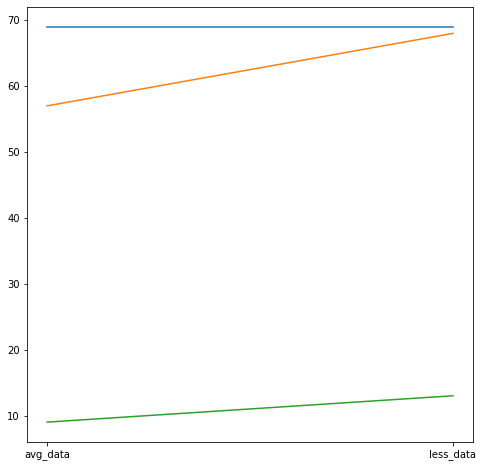

In [72]:
sites = ['scaffold_num', 'N_num', 'N_num_gapClosed']
fig, ax = plt.subplots(1, figsize=(8,8))
for i in sites:
    temp = df1[df1['site'] == i]
    plt.plot(temp.file, temp.value)

plt.show()

In [73]:
df2 = pd.read_csv('stats_comparison_big.csv')

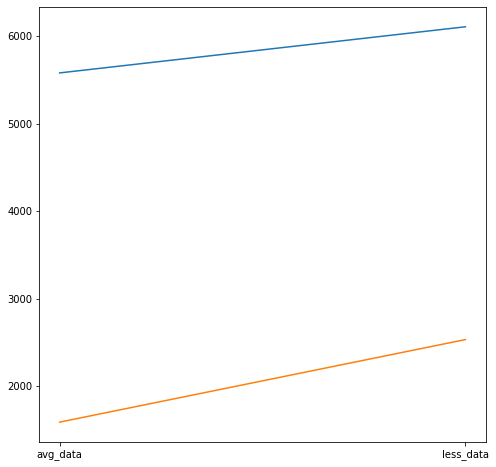

In [78]:
sites = ['N_length', 'N_length_gapClosed']
fig, ax = plt.subplots(1, figsize=(8,8))
for i in sites:
    temp = df2[df2['site'] == i]
    plt.plot(temp.file, temp.value)

plt.show()

In [79]:
# the number of scaffold stayed the same, the other parameters increased